# Statistical Machine Learning

## Machine Learning vs. Statistics

In the context of predictive modeling, what is the difference between machine learning and
statistics? There is not a bright line dividing the two disciplines. Machine learning tends to be
more focused on developing efficient algorithms that scale to large data in order to optimize
the predictive model. Statistics generally pays more attention to the probabilistic theory and
underlying structure of the model. Bagging, and the random forest (see “Bagging and the
Random Forest”), grew up firmly in the statistics camp. Boosting (see “Boosting”), on the
other hand, has been developed in both disciplines but receives more attention on the machine
learning side of the divide. Regardless of the history, the promise of boosting ensures that it
will thrive as a technique in both statistics and machine learning.

## K-Nearest Neighbors

The idea behind K-Nearest Neighbors (KNN) is very simple. For each record to
be classified or predicted:
1. Find K records that have similar features (i.e., similar predictor values).
2. For classification: Find out what the majority class is among those similar records, and assign that class to the new record.
3. For prediction (also called KNN regression): Find the average among those similar records, and predict that average for the new record.

- **Neighbor**: A record that has similar predictor values to another record.
- **Distance metrics**: Measures that sum up in a single number how far one record is from another.
- **Standardization**: Subtract the mean and divide by the standard deviation.
    - _Synonym_: Normalization
- **Z-score**: The value that results after standardization
- **K**: The number of neighbors considered in the nearest neighbor calculation

The prediction results depend on how the features are scaled, how
similarity is measured, and how big K is set. Also, all predictors must be in
numeric form

While the output of KNN for classification is typically a binary decision, such as default or
paid off in the loan data, KNN routines usually offer the opportunity to output a probability
(propensity) between 0 and 1. The probability is based on the fraction of one class in the $K$
nearest neighbors. In the preceding example, this probability of default would have been
estimated at $\frac{14}{20}$ or 0.7. Using a probability score lets you use classification rules other than
simple majority votes (probability of 0.5). This is especially important in problems with
imbalanced classes; see “Strategies for Imbalanced Data”. For example, if the goal is to
identify members of a rare class, the cutoff would typically be set below 50%. One common
approach is to set the cutoff at the probability of the rare event.

### Distance Metrics

Similarity (nearness) is determined using a distance metric, which is a function
that measures how far two records $(x_1, x_2, \cdots, x_p)$ and $(u_1, u_2, \cdots, u_p)$ are from one
another. The most popular distance metric between two vectors is Euclidean
distance. To measure the Euclidean distance between two vectors, subtract one
from the other, square the differences, sum them, and take the square root:

\begin{equation}
\sqrt{(x_1 - u_1)^2 +  (x_2 - u_2)^2 + \cdots + (x_p - u_p)^2}
\end{equation}

Another common distance metric for numeric data is Manhattan distance:

\begin{equation}
|x_1 - u_1| +  |x_2 - u_2| + \cdots + |x_p - u_p|
\end{equation}

Euclidean distance corresponds to the straight-line distance between two points. 
Manhattan distance is the distance between two points
traversed in a single direction at a time (e.g., traveling along rectangular city
blocks). For this reason, Manhattan distance is a useful approximation if
similarity is defined as point-to-point travel time.

In measuring distance between two vectors, variables (features) that are
measured with comparatively large scale will dominate the measure. For
example, for the loan data, the distance would be almost solely a function of the
income and loan amount variables, which are measured in tens or hundreds of
thousands. Ratio variables would count for practically nothing in comparison.
We address this problem by standardizing.

### One Hot Encoder

Most
statistical and machine learning models require categorical variables to be
converted to a series of binary dummy variables conveying the same
information

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

For example:

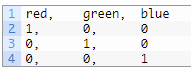

The binary variables are often called “dummy variables” in other fields, such as statistics.

### Standardization (Normalization, Z-Scores)

In measurement, we are often not so much interested in “how much” but “how
different from the average.” Standardization, also called normalization, puts all
variables on similar scales by subtracting the mean and dividing by the standard
deviation. In this way, we ensure that a variable does not overly influence a
model simply due to the scale of its original measurement.

\begin{equation}
z = \frac{x-\overline{x}}{s}
\end{equation}

These are commonly refered to as z-scores. Measurements are then stated in
terms of "standard deviations away from the mean." In this way, a variable's
impact on a model is not affected by the scale of its original measurement.

Using the z-score is just one way to rescale variables. Instead of the mean, a more robust
estimate of location could be used, such as the median. Likewise, a different estimate of scale
such as the interquartile range could be used instead of the standard deviation. Sometimes,
variables are “squashed” into the 0–1 range. It’s also important to realize that scaling each
variable to have unit variance is somewhat arbitrary. This implies that each variable is thought
to have the same importance in predictive power. If you have subjective knowledge that some
variables are more important than others, then these could be scaled up. For example, with the
loan data, it is reasonable to expect that the payment-to-income ratio is very important.

Normalization (standardization) does not change the distributional shape of the data; it does
not make it normally shaped if it was not already normally shaped.

### Choosing K

The choice of K is very important to the performance of KNN. The simplest
choice is to set $K=1$, known as the 1-nearest neighbor classifier. The
prediction is intuitive: it is based on finding the data record in the training set
most similar to the new record to be predicted. Setting $K=1$ is rarely the best
choice; you’ll almost always obtain superior performance by using $K > 1$ nearest
neighbors.

Generally speaking, if $K$ is too low, we may be overfitting: including the noise in
the data. Higher values of K provide smoothing that reduces the risk of
overfitting in the training data. On the other hand, if $K$ is too high, we may
oversmooth the data and miss out on KNN’s ability to capture the local structure
in the data, one of its main advantages.

The K that best balances between overfitting and oversmoothing is typically
determined by accuracy metrics and, in particular, accuracy with holdout or
validation data. There is no general rule about the best K—it depends greatly on
the nature of the data. For highly structured data with little noise, smaller values
of K work best. Borrowing a term from the signal processing community, this
type of data is sometimes referred to as having a high signal-to-noise ratio
(SNR). Examples of data with typically high SNR are handwriting and speech
recognition. For noisy data with less structure (data with a low SNR), such as the
loan data, larger values of K are appropriate. Typically, values of K fall in the
range 1 to 20. Often, an odd number is chosen to avoid ties.

### KNN as a Feature Engine

KNN gained its popularity due to its simplicity and intuitive nature. In terms of
performance, KNN by itself is usually not competitive with more sophisticated
classification techniques. In practical model fitting, however, KNN can be used
to add "local knowledge" in a staged process with other classification
techniques.

1. KNN is run on the data, and for each record, a classification (or quasiprobability of a class) is derived.
2. That result is added as a new feature to the record, and another classification method is then run on the data. The original predictor variables are thus used twice.

At first you might wonder whether this process, since it uses some predictors
twice, causes a problem with multicollinearity. This is
not an issue, since the information being incorporated into the second-stage
model is highly local, derived only from a few nearby records, and is therefore
additional information, and not redundant.

You can think of this staged use of KNN as a form of ensemble learning, in which multiple
predictive modeling methods are used in conjunction with one another. It can also be
considered as a form of feature engineering where the aim is to derive features (predictor
variables) that have predictive power. Often this involves some manual review of the data;
KNN gives a fairly automatic way to do this.

For example, consider the King County housing data. In pricing a home for sale,
a realtor will base the price on similar homes recently sold, known as “comps.”
In essence, realtors are doing a manual version of KNN: by looking at the sale
prices of similar homes, they can estimate what a home will sell for. We can
create a new feature for a statistical model to mimic the real estate professional
by applying KNN to recent sales. The predicted value is the sales price and the
existing predictor variables could include location, total square feet, type of
structure, lot size, and number of bedrooms and bathrooms. The new predictor
variable (feature) that we add via KNN is the KNN predictor for each record
(analogous to the realtors' comps). Since we are predicting a numerical value,
the average of the K-Nearest Neighbors is used instead of a majority vote
(known as KNN regression).

### Key Take Aways

- K-Nearest Neighbors (KNN) classifies a record by assigning it to the class that similar records belong to.
- Similarity (distance) is determined by Euclidian distance or other related metrics.
- The number of nearest neighbors to compare a record to, K, is determined by how well the algorithm performs on training data, using different values for K.
- Typically, the predictor variables are standardized so that variables of large scale do not dominate the distance metric.
- KNN is often used as a first stage in predictive modeling, and the predicted value is added back into the data as a predictor for second-stage (non-KNN) modeling.

## Tree Models

Tree models, also called Classification and Regression Trees (CART), decision
trees, or just trees, are an effective and popular classification (and regression)
method. Tree models,
and their more powerful descendents random forests and boosting, form the basis for the most widely
used and powerful predictive modeling tools in data science for both regression
and classification.

- **Recursive partitioning**: Repeatedly dividing and subdividing the data with the goal of making the outcomes in each final subdivision as homogeneous as possible.
- **Split value**: A predictor value that divides the records into those where that predictor is less than the split value, and those where it is more.
- **Node**: In the decision tree, or in the set of corresponding branching rules, a node is the graphical or rule representation of a split value.
- **Leaf**: The end of a set of if-then rules, or branches of a tree—the rules that bring you to that leaf provide one of the classification rules for any record in a tree.
- **Loss**: The number of misclassifications at a stage in the splitting process; the more losses, the more impurity.
- **Impurity**: The extent to which a mix of classes is found in a subpartition of the data (the more mixed, the more impure).
    - _Synonym_: Heterogeneity
    - _Antonym_: Homogeneity, purity
- **Pruning**: The process of taking a fully grown tree and progressively cutting its branches back, to reduce overfitting.

A tree model is a set of “if-then-else” rules that are easy to understand and to
implement. In contrast to regression and logistic regression, trees have the ability
to discover hidden patterns corresponding to complex interactions in the data.
However, unlike KNN or naive Bayes, simple tree models can be expressed in
terms of predictor relationships that are easily interpretable.

E.g. Example tree built on the loan dataset:

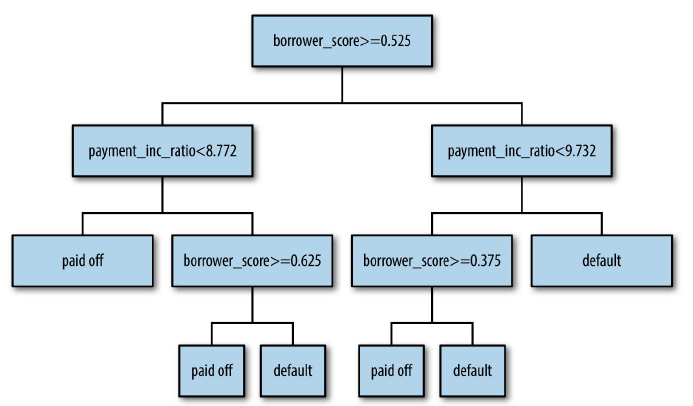

Typically, the tree is plotted upside-down, so the root is at the top and the leaves
are at the bottom. For example, if we get a loan with` borrower_score` of 0.6 and
a `payment_inc_ratio` of 8.0, we end up at the leftmost leaf and predict the loan
will be paid off

### The Recursive Partitioning Algorithm

The algorithm to construct a decision tree, called recursive partitioning , is
straightforward and intuitive. The data is repeatedly partitioned using predictor
values that do the best job of separating the data into relatively homogeneous
partitions:

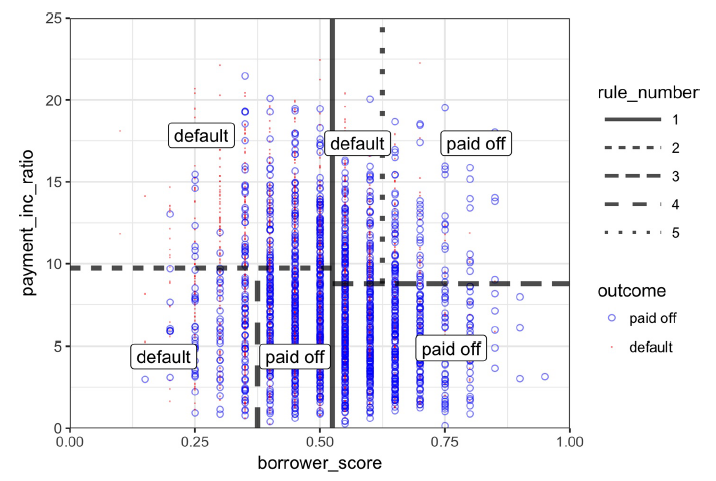

Above shows the rules created for the tree displayed earlier. The first rule is `borrower_score >= 0.525` and is depicted by rule
1 in the plot. The second rule is `payment_inc_ratio < 9.732` and divides the
righthand region in two.

Suppose we have a response variable Y and a set of P predictor variables $X_j$ for
$j=1, \cdots, P$. For a partition $A$ of records, recursive partitioning will find
the best way to partition A into two subpartitions:

1. For each predictor variable $X_j$,
    - For each value $s_j$ of $X_j$:
        - Split the records in $A$ with $X_j$ values < $s_j$ as one partition, and the remaining records where $X_j ≥ s_j$ as another partition.
        - Measure the homogeneity of classes within each subpartition of $A$
    - Select the value of s that produces maximum within-partition homogeneity of class.
2. Select the variable $X_j$ and the split value $s_j$ that produces maximum within-partition homogeneity of class.

Now comes the recursive part:

1. Initialize $A$ with the entire data set
2. Apply the partitioning algorithm to split $A$ into two subpartitions, $A_1$ and $A_2$
3. Repeat step 2 on subpartitions $A_1$ and $A_2$
4. The algorithm terminates when no further partition can be made that sufficiently improves the homogeneity of the partitions

The end result is a partitioning of the data like above. 

In addition to a binary 0/1 prediction, tree models can produce a probability estimate based on
the number of 0s and 1s in the partition. The estimate is simply the sum of 0s or 1s in the
partition divided by the number of observations in the partition.
\begin{equation}
Prob(Y=1)=\frac{Number\ of\ 1s\ in\ the\ partition}{Size\ of\ the\ partition}
\end{equation}

### Measuring Homogeneity or Impurity

Tree models recursively create partitions (sets of records), A, that predict an
outcome of $Y = 0$ or $Y = 1$. You can see from the preceding algorithm that we
need a way to measure homogeneity, also called class purity, within a partition.
Or, equivalently, we need to measure the impurity of a partition. The accuracy of
the predictions is the proportion $p$ of misclassified records within that partition,
which ranges from 0 (perfect) to 0.5 (purely random guessing).

It turns out that accuracy is not a good measure for impurity. Instead, two
common measures for impurity are the Gini impurity and entropy or information.
While these (and other) impurity measures apply to classification problems with
more than two classes, we focus on the binary case. The Gini impurity for a set
of records $A$ is (**Formulas are for binary classification**):

\begin{equation}
I(A) = p(1-p)
\end{equation}

The entropy measure is given by:
\begin{equation}
I(A) = -plog_2(p) - (1-p)log_2(1-p)
\end{equation}


**Formulas are for multi-class classification**

Gini impurity:
\begin{equation}
I(A) = 1 - \sum^C_{i=1}(p_i)^2
\end{equation}
$p_i$ is the proportion of samples that belongs to class C for a particular node

The entropy measure is given by:
\begin{equation}
I(A) = -\sum^C_{i=1}p_ilog_2(p_i)
\end{equation}
$p_i$ is the proportion of the samples that belongs to class C for a particular node. The entropy is zero if all samples at a node belong to the same class

**Gini impurity is not to be confused with the Gini coefficient. They represent similar concepts,
but the Gini coefficient is limited to the binary classification problem and is related to the AUC
metric**

The impurity metric is used in the splitting algorithm described earlier. For each
proposed partition of the data, impurity is measured for each of the partitions
that result from the split. A weighted average is then calculated, and whichever
partition (at each stage) yields the lowest weighted average is selected.

#### Worked Examples:

##### Gini
Lets say at a split there is:
- 1 blue class
- 5 green class

Gini score is: 

\begin{equation}
1 - \left( \left(\frac{1}{6}\right)^2 + \left(\frac{5}{6}\right)^2 \right) \\
= 1 - \left( 0.167^2 +0.833^2 \right) \\
= 1 - (0.027 + 0.693) \\
= 1 - 0.72 \\
= 0.28
\end{equation}

Lower the Gini score the better the split. A score of zero is a perfect split

##### Entropy

Lets say at a split there is:
- 1 blue class
- 5 green class

Entropy Score is:

\begin{equation}
- \left( \left(\frac{1}{6} log_2\frac{1}{6}\right) + \left(\frac{5}{6} log_2\frac{5}{6}\right) \right) \\
= - \left( 0.167 log_2(0.167) + 0.833 log_2(0.833) \right) \\
= - (-0.431 + -0.220) \\
= - -0.650 \\
= 0.650
\end{equation}

Lower the entropy score the better the split. A score of zero is a perfect split


### Stopping the Tree from Growing

As the tree grows bigger, the splitting rules become more detailed, and the tree
gradually shifts from identifying "big" rules that identify real and reliable
relationships in the data to "tiny" rules that reflect only noise. A fully grown tree
results in completely pure leaves and, hence, 100% accuracy in classifying the
data that it is trained on. This accuracy is, of course, illusory—we have overfit the data, fitting the noise in the training data, not
the signal that we want to identify in new data.

We need some way to determine when to stop growing a tree at a stage that will
generalize to new data. There are two common ways to stop splitting:

1. Avoid splitting a partition if a resulting subpartition is too small, or if a terminal leaf is too small
2. Don’t split a partition if the new partition does not "significantly" reduce the impurity. `min_impurity_decrease` in sklearn. A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The first method involves arbitrary rules, and can be usful for exploratory work,
but we can’t easily determine optimum values (i.e., values that maximize
predictive accuracy with new data).

If `min_impurity_decrease` is too small, then the tree will overfit the data, fitting noise and not signal.
On the other hand, if `min_impurity_decrease` too large, then the tree will be too small and have
little predictive power. For large datasets set this to 0.005 to start off with and then tune with a grid search cross-validation.

#### Pruning

A simple and intuitive method of reducing tree size is to prune back the terminal and smaller
branches of the tree, leaving a smaller tree. How far should the pruning proceed? A common
technique is to prune the tree back to the point where the error on holdout data is minimized.
When we combine predictions from multiple trees,
however, we will need a way to stop tree growth. Pruning plays a role in the process of cross-validation
to determine how far to grow trees that are used in ensemble methods.

### Predicting a Continuous Value

Predicting a continuous value (also termed regression) with a tree follows the
same logic and procedure, except that impurity is measured by squared
deviations from the mean (squared errors) in each subpartition, and predictive
performance is judged by the square root of the mean squared error (RMSE) in each partition.

### How Trees Are Used

One of the big obstacles faced by predictive modelers in organizations is the
perceived "black box" nature of the methods they use, which gives rise to
opposition from other elements of the organization. In this regard, the tree model
has two appealing aspects.

- Tree models provide a visual tool for exploring the data, to gain an idea of what variables are important and how they relate to one another. Trees can capture nonlinear relationships among predictor variables.
- Tree models provide a set of rules that can be effectively communicated to nonspecialists, either for implementation or to "sell" a data mining project.

When it comes to prediction, however, harnassing the results from multiple trees
is typically more powerful than just using a single tree. In particular, the random
forest and boosted tree algorithms almost always provide superior predictive
accuracy and performance, but the aforementioned advantages of a single tree are lost.

### Key Takeaways
- Decision trees produce a set of rules to classify or predict an outcome
- The rules correspond to successive partitioning of the data into subpartitions
- Each partition, or split, references a specific value of a predictor variable and divides the data into records where that predictor value is above or below that split value
- At each stage, the tree algorithm chooses the split that minimizes the outcome impurity within each subpartition
- When no further splits can be made, the tree is fully grown and each terminal node, or leaf, has records of a single class; new cases following that rule (split) path would be assigned that class
- A fully grown tree overfits the data and must be pruned back so that it captures signal and not noise
- Multiple-tree algorithms like random forests and boosted trees yield better predictive performance, but lose the rule-based communicative power of single trees

## Bagging and the Random Forest

- **Ensemble**: Forming a prediction by using a collection of models.
    - _Synonym_: Model averaging
- **Bagging**: A general technique to form a collection of models by bootstrapping the data.
    - _Synonym_: Bootstrap aggregation
- **Random forest**: A type of bagged estimate based on decision tree models.
    - _Synonym_: Bagged decision trees
- **Variable importance**: A measure of the importance

The simple version of ensembles is as follows:
1. Develop a predictive model and record the predictions for a given data set.
2. Repeat for multiple models, on the same data.
3. For each record to be predicted, take an average (or a weighted average, or a majority vote) of the predictions.

Ensemble methods have been applied most systematically and effectively to
decision trees. Going beyond the simple ensemble algorithm, there are two main variants of
ensemble models: bagging and boosting. In the case of ensemble tree models,
these are refered to as random forest models and boosted tree models.

### Bagging

Bagging, stands for "bootstrap aggregating". Suppose we have a response $Y$ and $P$ predictor variables $X=X_1. X_2, \cdots, X_p$ with $n$ records
with n records.

Bagging is like the basic algorithm for ensembles, except that, instead of fitting
the various models to the same data, each new model is fit to a bootstrap
resample. Here is the algorithm presented more formally:

1. Initialize $M$, the number of models to be fit, and $n$, the number of records to choose $(n < N)$. Set the iteration $m=1$
2. Take a bootstrap resample (i.e., with replacement) of $n$ records from the training data to form a subsample $Y_m$ and $X_m$ (the bag)
3. Train a model using $Y_m$ and X_m to create a set of decision rules $\hat{f_m}(X)$.
4. Increment the model counter $m=m+1$. If $m <= M$, go to step 1.

In the case where $\hat{f_m}$ predicts the probability $Y=1$, the bagged estimate is
given by:

\begin{equation}
\hat{f} = \frac{1}{M}\left(\hat{f_1}(X)+\hat{f_2}(X)+\cdots+\hat{f+M}(X)\right)
\end{equation}

### Random Forest

The random forest is based on applying bagging to decision trees with one
important extension: in addition to sampling the records, the algorithm also
samples the variables. In traditional decision trees, to determine how to create a
subpartition of a partition $A$, the algorithm makes the choice of variable and split
point by minimizing a criterion such as Gini impurity. With random forests, at each stage of the algorithm,
the choice of variable is limited to a random subset of variables. Compared to
the basic tree algorithm, the
random forest algorithm adds two more steps: the bagging discussed earlier, and the bootstrap sampling of variables at
each split:
1. Take a bootstrap (with replacement) subsample from the records.
2. For the first split, sample $p < P$ variables at random without replacement.
3. For each of the sampled variables $X_{j(1)}, X_{j(2)}, \cdots, X_{j(p)}$, apply the splitting algorithm:
    1. For each value $s_{j(k)}$ of $X_{j(k)}$
        1. Split the records in partition $A$ with $X_{j(k)} < s_{j(k)}$ as one partition, and the remaining records where $X_{j(k)} \geq s_{j(k)}$ as another partition
        2. Measure the homogeneity of classes within each subpartition of A.
    2. Select the value of $s_{j(k)}$ that produces maximum within-partition homogeneity of class.
4. Select the variable $X_{j(k)}$ and the split value $s_{j(k)}$ that produces maximum within-partition homogeneity of class.
5. Proceed to the next split and repeat the previous steps, starting with step 2.
6. Continue with additional splits following the same procedure until the tree is grown.
7. Go back to step 1, take another bootstrap subsample, and start the process over again.

How many variables to sample at each step? A rule of thumb is to choose $\sqrt{P}$
where P is the number of predictor variables.

The out-of-bag (OOB) estimate of error is the error rate for the trained models,
applied to the data left out of the training set for that tree. Using the output from
the model, the OOB error can be plotted versus the number of trees in the
random forest.

The random forest method is a “black box” method. It produces more accurate
predictions than a simple tree, but the simple tree’s intuitive decision rules are
lost. The predictions are also somewhat noisy.

### Variable Importance

The power of the random forest algorithm shows itself when you build
predictive models for data with many features and records. It has the ability to
automatically determine which predictors are important and discover complex
relationships between predictors corresponding to interaction terms.

There are two ways to measure variable importance:
- By the decrease in accuracy of the model if the values of a variable are randomly permuted. Randomly permuting the values has the effect of removing all predictive power for that variable. The accuracy is computed from the out-of-bag data (so this measure is effectively a cross-validated estimate).
- By the mean decrease in the Gini impurity score for all of the nodes that were split on a variable. This measures how much improvement to the purity of the nodes that variable contributes. This measure is based on the training set, and therefore less reliable than a measure calculated on out-of-bag data.

### Hyperparameters

The random forest, as with many statistical machine learning algorithms, can be
considered a black-box algorithm with knobs to adjust how the box works.
These knobs are called hyperparameters, which are parameters that you need to
set before fitting a model; they are not optimized as part of the training process.
While traditional statistical models require choices (e.g., the choice of predictors
to use in a regression model), the hyperparameters for random forest are more
critical, especially to avoid overfitting.

### Key Takeaways
- Ensemble models improve model accuracy by combining the results from many models.
- Bagging is a particular type of ensemble model based on fitting many models to bootstrapped samples of the data and averaging the models.
- Random forest is a special type of bagging applied to decision trees. In addition to resampling the data, the random forest algorithm samples the predictor variables when splitting the trees.
- A useful output from the random forest is a measure of variable importance that ranks the predictors in terms of their contribution to model accuracy.
- The random forest has a set of hyperparameters that should be tuned using cross-validation to avoid overfitting.

## Boosting

- **Ensemble**: Forming a prediction by using a collection of models
    - _Synonym_: Model averaging
- **Boosting**: A general technique to fit a sequence of models by giving more weight to the records with large residuals for each successive round
- **Adaboost**: An early version of boosting based on reweighting the data based on the residuals
- **Gradient boosting**: A more general form of boosting that is cast in terms of minimizing a cost function
- **Stochastic gradient boosting**: The most general algorithm for boosting that incorporates resampling of records and columns in each round
- **Regularization**: A technique to avoid overfitting by adding a penalty term to the cost function on the number of parameters in the model.
- **Hyperparameters**: Parameters that need to be set before fitting the algorithm

### The Boosting Algorithm
The basic idea behind the various boosting algorithms is essentially the same.
The easiest to understand is Adaboost, which proceeds as follows:

1. Initialise $M$, the maximum number of models to be fit, and set the iteration counter to $m=1$. Initialise he observations weights $w_i=1/N$ for $i = 1,2, \cdots, N$. Initialise the ensemble model $\hat{F_0} = 0$
2. Train a model using $\hat{f_m}$ using the observation weights $w_1, w_2, \cdots, w_N$ that minimises the weighted error $e_m$ defined by summing the weights for the misclassified observations.
3. Add the model to the ensemble: $\hat{F_m} = \hat{F_{m-1}}+\alpha_m \hat{f_m}$ where $\alpha_m = \frac{log 1-e_m}{e_m}$
4. Update the weights $w_1, w_2, \cdots, w_N$ so that the weights are increased for the observations that were misclassified. The size of the increase depends on $\alpha_m$ with larger values of $alpha_m$ leading to bigger weights
5. Increment the model counter $m=m+1$. If $m \leq M$ go to step 1.

The boosted estimate is given by:

\begin{equation}
\hat{F} = \alpha_1 \hat{f_1} + \alpha_2 \hat{f_2} + \cdots + \alpha_M \hat{f_M}
\end{equation}

By increasing the weights for the observations that were misclassified, the
algorithm forces the models to train more heavily on the data for which it
performed poorly. The factor $\alpha_m$ ensures that models with lower error have a
bigger weight.

Gradient boosting is similar to Adaboost but casts the problem as an
optimization of a cost function. Instead of adjusting weights, gradient boosting
fits models to a pseudo-residual, which has the effect of training more heavily on
the larger residuals. In the spirit of the random forest, stochastic gradient
boosting adds randomness to the algorithm by sampling observations and
predictor variables at each stage.

### XGBoost

The most widely used public domain software for boosting is XGBoost.
The function xgboost has many parameters that can, and should, be adjusted. 
Two very important parameters
are **subsample**, which controls the fraction of observations that should be
sampled at each iteration, and **learning rate** a shrinkage factor applied to $\alpha_m$ in the
boosting algorithm. **Using subsample makes
boosting act like the random forest except that the sampling is done without
replacement. The shrinkage parameter learning rate is helpful to prevent overfitting by
reducing the change in the weights (a smaller change in the weights means the
algorithm is less likely to overfit to the training set).**

### Regularization: Avoiding Overfitting

Blind application of xgboost can lead to unstable models as a result of
overfitting to the training data. The problem with overfitting is twofold:

- The accuracy of the model on new data not in the training set will be degraded.
- The predictions from the model are highly variable, leading to unstable results.

Any modeling technique is potentially prone to overfitting. For example, if too
many variables are included in a regression equation, the model may end up with
spurious predictions. However, for most statistical techniques, overfitting can be
avoided by a judicious selection of predictor variables. Even the random forest
generally produces a reasonable model without tuning the parameters. This,
however, is not the case for xgboost

Regularization is a technique that modifies the cost function in order to penalize
the complexity of the model. Decision trees are fit by minimizing cost criteria
such as Gini’s impurity score. In
xgboost, it is possible to modify the cost function by adding a term that
measures the complexity of the model.

There are two parameters in xgboost to regularize the model: alpha and
lambda, which correspond to Manhattan distance and squared Euclidean
distance, respectively. Increasing these parameters will
penalize more complex models and reduce the size of the trees that are fit.

### Key Takeaways

- Boosting is a class of ensemble models based on fitting a sequence of models, with more weight given to records with large errors in successive rounds.
- Stochastic gradient boosting is the most general type of boosting and offers the best performance. The most common form of stochastic gradient boosting uses tree models.
- XGBoost is a popular and computationally efficient software package for stochastic gradient boosting; it is available in all common languages used in data science.
- Boosting is prone to overfitting the data, and the hyperparameters need to be tuned to avoid this.
- Regularization is one way to avoid overfitting by including a penalty term on the number of parameters (e.g., tree size) in a model.
- Cross-validation is especially important for boosting due to the large number of hyperparameters that need to be set.